Secondary Structure options test script
=======================================
This test script is to test implemented features with 2D secondary structures.

You can also use it to view the different options and how they look.
The function calls are likely to stay the same, but the default plots
may look a little different in the future.

Currently broken:
* nothing that I'm aware of

Notebook set-up
---------------

In [1]:
# This sets plots to display in-line by default
%matplotlib inline

# Import module, for high-level functions, no additional modules are needed
import plotmapper as MaP

# Creates an HTML button that hides/shows code cells
# Useful for lab notebook reports and research updates
# NOTE: this does not display well on GitHub.
MaP.create_code_button()

Initializing MaP sample
-----------------------
If you have consistently named files, (which you should), you can use a function to create a dictionary of keyword arguments (kwargs). Then, "unpack" the dictionary using the double asterisk.

In [2]:
path = 'data/'
def kwargs(sample):
    kwargs = {}
    kwargs["sample"] = sample
    kwargs["profile"] = path+sample+"_rnasep_profile.txt"
    kwargs["ct"] = path+"RNaseP.ct"
    kwargs["ss"] = path+"RC_CRYSTAL_STRUCTURE.xrna"
    kwargs["rings"] = path+sample+"-rnasep.corrs"
    kwargs["pairs"] = path+sample+"-rnasep-pairmap.txt"
    kwargs["log"] = path+sample+"_shapemapper_log.txt"
    kwargs["dance_prefix"] = path+sample+"_rnasep"
    kwargs["deletions"] = path+"example-rnasep-deletions.txt"
    kwargs["fasta"] = path+"RNaseP-noSC.fasta"
    kwargs["pdb"] = path+"3dhs_Correct.pdb"
    kwargs["pdb_kwargs"] = {"chain":"A"}
    return kwargs

example = MaP.Sample(**kwargs("example2"))

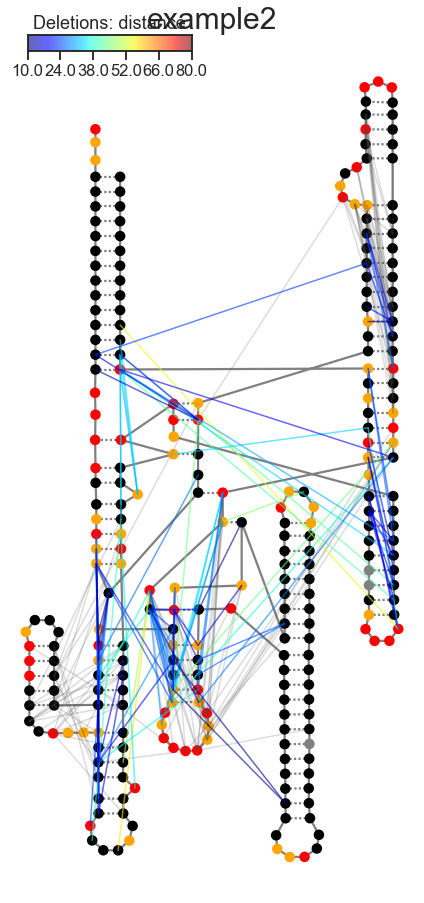

In [3]:
example.make_ss(ij="deletions", metric="Distance", Percentile=0.98)

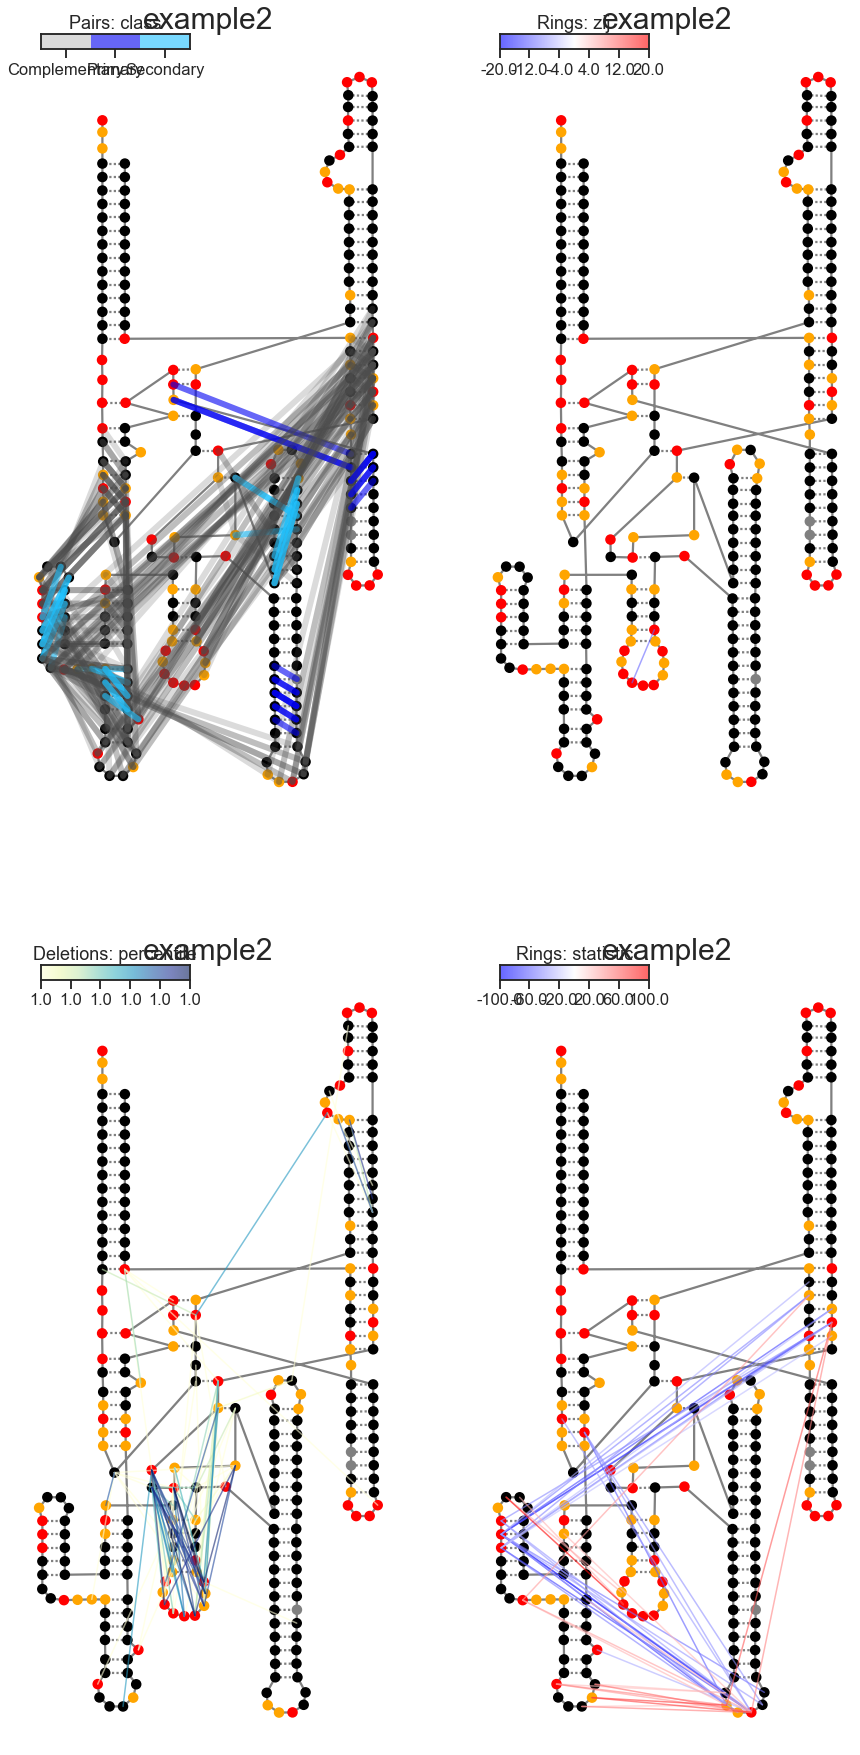

In [4]:
example.make_ss_multifilter([{"ij":"pairs", "all_pairs":True},
                             {"ij":"rings", "metric":"Zij", "Zij":10, "profAbove":0.8},
                             {"ij":"deletions", "Percentile":0.95, "ss_only":True},
                             {"ij":"rings", "metric":"Statistic", "Statistic":20, "cdAbove":20}
                            ])